Каждый студент получает выборку из 20 чисел
(  Мой номер в списке группы -> 3)

In [ ]:
import numpy as np 
input_array = np.array([-0.03, 0.73, -0.59, -1.59, 0.38, 1.49, 0.14, -0.62, -1.59, 1.45, -0.38, -1.49, -0.15, 0.63, 0.06, -1.59, 0.61, 0.62, -0.05, 1.56])
input_array

array([-0.03,  0.73, -0.59, -1.59,  0.38,  1.49,  0.14, -0.62, -1.59,
        1.45, -0.38, -1.49, -0.15,  0.63,  0.06, -1.59,  0.61,  0.62,
       -0.05,  1.56])

####Необходимо определить следующие статистические характеристики:

1. вариационный ряд

In [ ]:
input_array = np.sort(input_array, axis=None)
input_array

array([-1.59, -1.59, -1.59, -1.49, -0.62, -0.59, -0.38, -0.15, -0.05,
       -0.03,  0.06,  0.14,  0.38,  0.61,  0.62,  0.63,  0.73,  1.45,
        1.49,  1.56])

Для построения таблицы неплохо бы создать множество элементов. 

In [ ]:
input_set = set(input_array.flatten())
input_set = sorted(input_set)
input_set

[-1.59,
 -1.49,
 -0.62,
 -0.59,
 -0.38,
 -0.15,
 -0.05,
 -0.03,
 0.06,
 0.14,
 0.38,
 0.61,
 0.62,
 0.63,
 0.73,
 1.45,
 1.49,
 1.56]

Создадим таблицу: 

In [ ]:
import pandas as pd
import collections
df = pd.DataFrame(columns=['xi', 'fi = X.count(xi)','xi * fi', 'Accumulated frequency', '|xi-x_average|*fi', '(xi-x_average)^2 *fi', 'Relative frequency' ])
af = df["Accumulated frequency"].sum()
for val in input_set:
  xi = val
  fi = ((input_array==xi).sum())
  xi_fi = xi*fi
  af += fi
  abs_fi = abs(xi - input_array.mean()) * fi
  square_fi = (xi - input_array.mean())**2 * fi
  rf = fi/ (input_array.shape[0])

  df.loc[len(df.index)] = [xi, fi, xi_fi, af, abs_fi, square_fi, rf]


df

,xi,fi = X.count(xi),xi * fi,Accumulated frequency,|xi-x_average|*fi,(xi-x_average)^2 *fi,Relative frequency
0,-1.59,3.0,-4.77,3.0,4.7085,7.389991,0.15
1,-1.49,1.0,-1.49,4.0,1.4695,2.159430,0.05
2,-0.62,1.0,-0.62,5.0,0.5995,0.359400,0.05
3,-0.59,1.0,-0.59,6.0,0.5695,0.324330,0.05
4,-0.38,1.0,-0.38,7.0,0.3595,0.129240,0.05
5,-0.15,1.0,-0.15,8.0,0.1295,0.016770,0.05
6,-0.05,1.0,-0.05,9.0,0.0295,0.000870,0.05
7,-0.03,1.0,-0.03,10.0,0.0095,0.000090,0.05
8,0.06,1.0,0.06,11.0,0.0805,0.006480,0.05
9,0.14,1.0,0.14,12.0,0.1605,0.025760,0.05


Построим Summary table

Для проверки себя можно использовать следующий сервис: https://math.semestr.ru/group/group.php

In [ ]:
summary_df = pd.DataFrame(columns=["Sum fi", "M(X)", "Sum |xi-x_average|*fi", "Sum (xi-x_average)^2 *fi", "Sum Relative frequency", "Min", "Max", "Scope"])
summary_df.loc[len(summary_df.index)] = [df["fi = X.count(xi)"].sum(), df["xi * fi"].sum(), df["|xi-x_average|*fi"].sum(), df["(xi-x_average)^2 *fi"].sum(), df["Relative frequency"].sum(), df["xi"].min(), df["xi"].max(), df["xi"].max() - df["xi"].min()]

summary_df

,Sum fi,M(X),Sum |xi-x_average|*fi,Sum (xi-x_average)^2 *fi,Sum Relative frequency,Min,Max,Scope
0,20.0,-0.41,15.75,19.308895,1.0,-1.59,1.56,3.15


Теперь у нас есть вариационный ряд, экстремальные значения и размах, оценки математического ожидания

среднеквадратического отклонение
Для начала найдем дисперсию, а потом и СКО.

In [ ]:
D = (df["(xi-x_average)^2 *fi"].sum())/(df["fi = X.count(xi)"].sum())
D

0.9654447500000002

In [ ]:
sigma = D**0.5
sigma

0.9825704809325386

Найдем и оценку СКО. 
Для начала вычислим несмещенную оценку дисперсии

In [ ]:
S2 = df["(xi-x_average)^2 *fi"].sum()/(df["fi = X.count(xi)"].sum()-1)
S2

1.0162576315789476

In [ ]:
s = S2**0.5
s

1.0080960428346832

В качестве оценки для математического ожидания естественно предложить среднее арифметическое наблюденных значения. Нетрудно убедиться, что эта оценка является состоятельной: согласно закону больших чисел, при увеличении n величина m с волной (С.О.) сходится по вероятности к m.

In [ ]:
sm = (df["xi * fi"].sum())/(df.shape[0])
sm

-0.022777777777777824

теперь будем искать эмпирическую функцию распределения. 
Тут добавим сглаживание 

<Axes: ylabel='Density'>

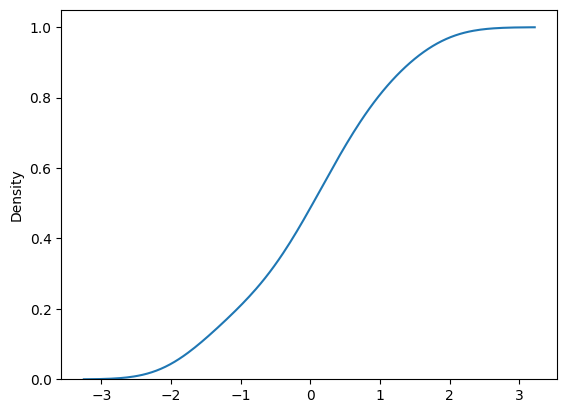

In [ ]:
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.kdeplot(input_array, cumulative=True)

а тут без него

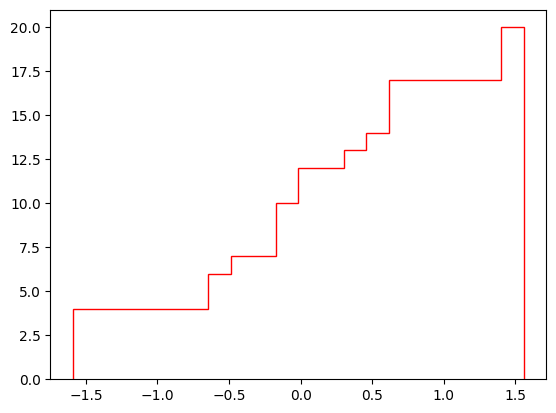

In [ ]:
a = plt.hist(input_array, histtype='step', cumulative=True, bins=len(input_array), color="Red")

Давайте еще руками запишем саму функцию: 

In [ ]:
array_of_frequency = df["Relative frequency"]
array_of_values = df["xi"]
print(*array_of_frequency)
print()
print(*array_of_values)
def F(x):
  prob = 0
  if(x < array_of_values[0]).any():
    return prob
  if(x>=array_of_values[len(array_of_values)-1]).any():
    return 1
  i=0
  while (x > array_of_values[i]).any():
    prob+=array_of_frequency[i]
    i+=1
  return prob
print()
F(0)

0.15 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05

-1.59 -1.49 -0.62 -0.59 -0.38 -0.15 -0.05 -0.03 0.06 0.14 0.38 0.61 0.62 0.63 0.73 1.45 1.49 1.56



0.49999999999999994

На всякий случай построим и этот график:

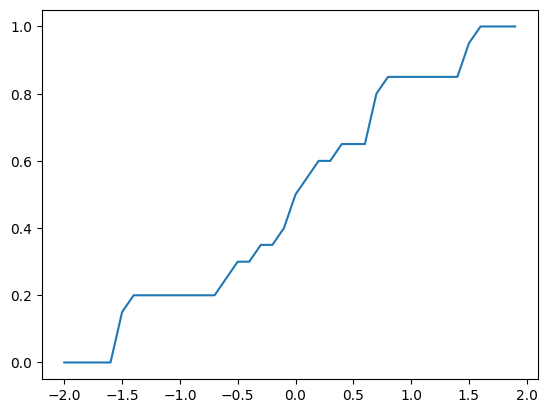

In [ ]:
x = [ii/10 for ii in range(-20, 20)]
y = [F(ii) for ii in x]

plt.plot(x, y)


Построим гистограмму приведенных частот группированной выборки

<ipython-input-212-4e5df35cf8f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(input_array)


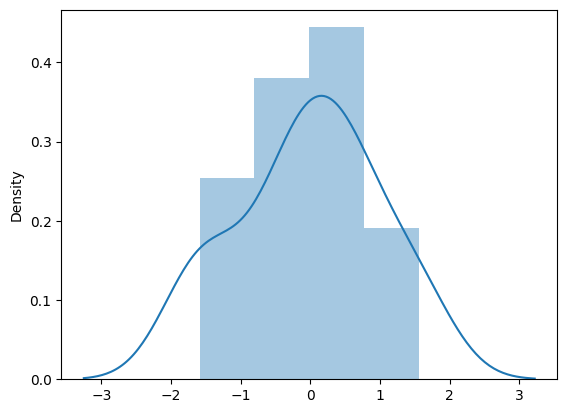

In [ ]:
sns_plot = sns.distplot(input_array)
fig = sns_plot.get_figure()

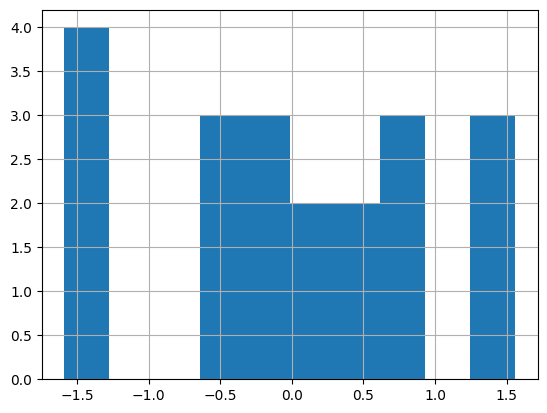

In [ ]:
reserved_df = pd.DataFrame(columns=['xi'])
reserved_df["xi"] = input_array

h = reserved_df['xi'].hist()
fig = h.get_figure()

 Построим полигон приведенных частот группированной выборки

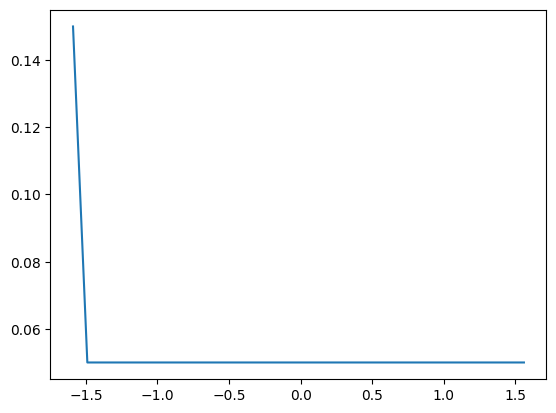

In [ ]:
x = df["xi"]
y = df["Relative frequency"]
plt.plot(x, y)